In [137]:
'''
Frames
Matrices, Vector Norms, Eigenvectors and Eigenvalues
Matrix Decompositions (SVD)
Singular Value Decomposition Applications
Jacobians
ODE I
ODE II
Basics of probability
Bayesian reasoning
Random variables
Joint random variables + covariance
'''


'\nFrames\nMatrices, Vector Norms, Eigenvectors and Eigenvalues\nMatrix Decompositions (SVD)\nSingular Value Decomposition Applications\nJacobians\nODE I\nODE II\nBasics of probability\nBayesian reasoning\nRandom variables\nJoint random variables + covariance\n'

In [138]:
import numpy as np
cos=np.cos
sin=np.sin
def rx(theta):
    return np.array(([1,0,0],[0,cos(theta),-sin(theta)],[0,sin(theta),cos(theta)]))

def ry(theta):
    return np.array(([cos(theta),0,sin(theta)],[0,1,0],[-sin(theta),0,cos(theta)]))

def rz(theta):
    return np.array(([cos(theta),-sin(theta),0],[sin(theta),cos(theta),0],[0,0,1]))

def homo_trans(r,t):
    r=np.deg2rad(r)
    rot_matrix=rz(r[2])@ry(r[1])@rx(r[0])
    top=np.hstack((rot_matrix,t[np.newaxis].T))
    # add[0, 0, 0, 1] at the bottom to make it 4x4
    trans=np.vstack((top,np.array([0,0,0,1])))
    return trans

twr=homo_trans(np.array([0.0,0.0,30.]),np.array([4.3,5.1,0.]))
print(twr)

[[ 0.8660254 -0.5        0.         4.3      ]
 [ 0.5        0.8660254  0.         5.1      ]
 [ 0.         0.         1.         0.       ]
 [ 0.         0.         0.         1.       ]]


In [139]:
# GIMBAL LOCK
alpha1 = np.pi/6
beta1 = -np.pi/2
gamma1 = -np.pi/4

alpha2 = -np.pi/4
beta2 = -np.pi/2
gamma2 = np.pi/6
p=np.array([1.,1.,1])
p_a = rz(alpha1) @ ry(beta1) @ rx(gamma1).dot(p)
p_b = rz(alpha2) @ ry(beta2) @ rx(gamma2).dot(p)
print(p_a)
print(p_b)

[-0.70710678  1.22474487  1.        ]
[-0.70710678  1.22474487  1.        ]


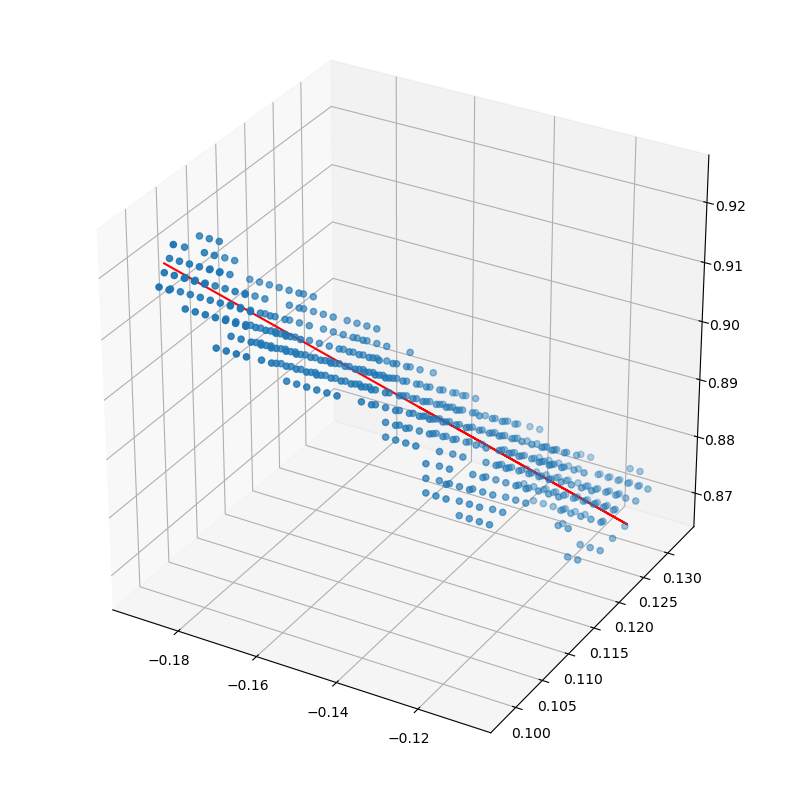

In [140]:
# PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def PCA(matrix):
    cov_mat=np.cov(matrix.T)
    eig_val,eig_vec=np.linalg.eigh(cov_mat)
    long=eig_vec.T[np.argmax(eig_val)]
    return long

matrix=np.genfromtxt('data/object.pcd')
long=PCA(matrix)
def plot(axis,matrix,long):
    mean=np.mean(matrix,axis=0)
    diff=matrix-mean
    product=diff@long
    points=np.array([mean,mean+long*np.min(product),mean+long*np.max(product)])
    return axis.plot(points[:,0],points[:,1],points[:,2],'r')
fig=plt.figure(figsize=(10,10))
axis=fig.add_subplot(111,projection='3d')
axis.scatter(matrix[:,0],matrix[:,1],matrix[:,2])
plot(axis, matrix, long)


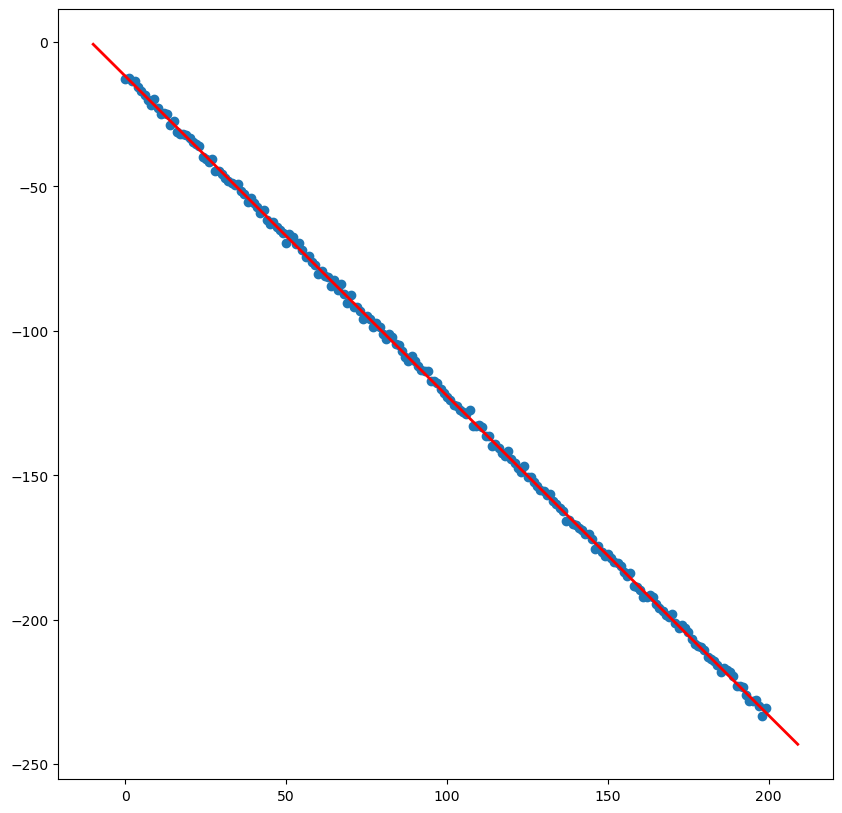

In [141]:
#fit line
def fit_line(data):
    X=data[:,0]
    Y=data[:,1]
    A=np.hstack((X[np.newaxis].T,np.ones((len(X),1))))
    B=Y[np.newaxis].T
    x=np.linalg.pinv(A)@B
    m = x[0]
    c = x[1]
    return m,c
data=np.load("data/line.npy")
m,c=fit_line(data)
x=np.linspace(np.min(data[:,0])-10,np.max(data[:,0])+10,1000)
y=m*x+c
fig=plt.figure(figsize=(10,10))

plt.scatter(data[:,0], data[:,1])
plt.plot(x, y, color='r', linewidth=2)
plt.show()


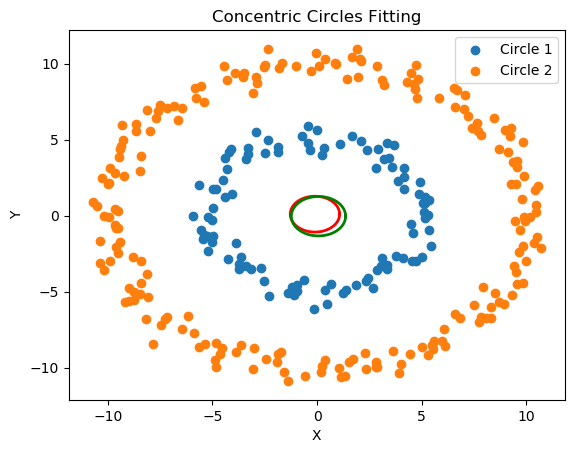

In [142]:
import numpy as np
import matplotlib.pyplot as plt

def fit_circle(X, Y, radius):
    # Generate an array of angles from 0 to 2*pi
    theta = np.linspace(0., 2 * np.pi, 100)
    
    # Construct the matrix A with columns X, Y, and a column of ones
    A = np.hstack((X[np.newaxis].T, Y[np.newaxis].T, np.ones((len(X), 1))))
    
    # Construct the matrix B as the sum of squared X and Y coordinates
    B = (X**2 + Y**2 - radius**2)[np.newaxis].T
    
    # Compute the pseudo-inverse of A
    pseudo_inverse = np.linalg.pinv(A)
    
    # Multiply the pseudo-inverse with B to obtain the result
    result = pseudo_inverse @ B
    
    # Extract the parameters of the circle: a, b, and the radius
    a = result[0] / 2.
    b = result[1] / 2.
    radius = np.sqrt(result[2] + a**2 + b**2)
    
    # Generate new x-coordinates of points on the fitted circle
    x_new = a + radius * np.cos(theta)
    
    # Generate new y-coordinates of points on the fitted circle
    y_new = b + radius * np.sin(theta)
    
    # Return the new x and y coordinates
    return x_new, y_new

# Generate sample data for two concentric circles
radius1 = 5
radius2 = 10
theta1 = np.linspace(0, 2 * np.pi, 100)
theta2 = np.linspace(0, 2 * np.pi, 200)
x1 = radius1 * np.cos(theta1) + np.random.normal(0, 0.5, 100)
y1 = radius1 * np.sin(theta1) + np.random.normal(0, 0.5, 100)
x2 = radius2 * np.cos(theta2) + np.random.normal(0, 0.5, 200)
y2 = radius2 * np.sin(theta2) + np.random.normal(0, 0.5, 200)

# Create a scatter plot of the original points
plt.scatter(x1, y1, label='Circle 1')
plt.scatter(x2, y2, label='Circle 2')

# Fit and plot the first circle
x1_new, y1_new = fit_circle(x1, y1, radius1)
plt.plot(x1_new, y1_new, color='r', linewidth=2)

# Fit and plot the second circle
x2_new, y2_new = fit_circle(x2, y2, radius2)
plt.plot(x2_new, y2_new, color='g', linewidth=2)

# Set plot title and labels
plt.title('Concentric Circles Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Display the plot
plt.show()


In [143]:
# jacobians - contains partial derivates

''' 
Banach fixed point theorem x* for which fx* = x* -- conditions guarantees a fixed point that doesnt move when u apple an operation
Banach's fixed point theorem states that any contraction mapping on a complete metric space has a unique fixed point. In other words, 
if a function maps a metric space to itself and 
the distance between the function's outputs 
decreases with each iteration, then there 
exists a unique point in the space that is 
mapped to itself by the function.
- FINDING FIX POINTS
- F is self mapping, 1 solution exists when F is contraction
- generally found with linear convergence

Newton Taylor's theorem generalizes better to higher dimensions

'''



" \nBanach fixed point theorem x* for which fx* = x* -- conditions guarantees a fixed point that doesnt move when u apple an operation\nBanach's fixed point theorem states that any contraction mapping on a complete metric space has a unique fixed point. In other words, \nif a function maps a metric space to itself and \nthe distance between the function's outputs \ndecreases with each iteration, then there \nexists a unique point in the space that is \nmapped to itself by the function.\n- FINDING FIX POINTS\n- F is self mapping, 1 solution exists when F is contraction\n- generally found with linear convergence\n\nNewton Taylor's theorem generalizes better to higher dimensions\n\n"